In [11]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import seed, shuffle, randn

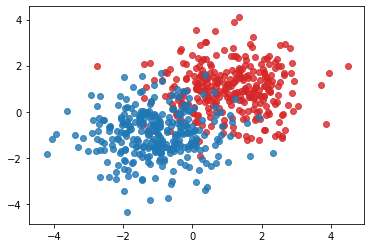

In [38]:
# Set seed to reproduce results
seed(1643)
nexamples = 300

# Agrupa filas: un termino de corrección (bias) y una matriz de
# 2 X nexamples de ruido gaussiano con media != 0
c1 = np.r_[np.ones((1, nexamples)), randn(2, nexamples) + 1]
c2 = np.r_[np.ones((1, nexamples)), randn(2, nexamples) - 1]

# Clasificamos nexamples del primer grupo (media = 1) y
# nexamples del segundo grupo (media - 1)
y = np.r_[np.ones(nexamples), np.zeros(nexamples)].reshape(-1, 1)
X = np.c_[c1, c2]

# Agrupamos las filas y columnas para permutar
# su orden 
data = np.r_[X, y.T].T
shuffle(data)
X = data[:, :3]
y = data.T[-1, :]

plt.scatter(*c1[1:,:], color="tab:red", alpha=0.8)
plt.scatter(*c2[1:,:], color="tab:blue", alpha=0.8);

In [76]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [91]:
N, M = X.shape
w = np.zeros(M)
alpha = 0.1

for i in range(100):
    w = w - alpha * ((sigmoid(X @ w.T) - y)[:, np.newaxis] * X).sum(axis=0) / N

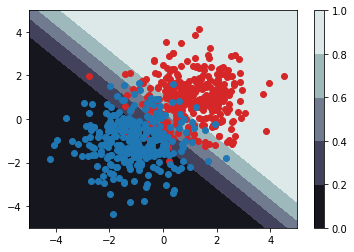

In [97]:
mesh = np.mgrid[-5:5:0.01, -5:5:0.01]
xx, yy = mesh
_, k, k = mesh.shape
bias_mesh = np.ones((1, k, k))
mesh = np.concatenate((bias_mesh, mesh))
Z = np.einsum("i,ijk->jk", w, mesh)
Z = sigmoid(Z)

plt.contourf(xx, yy, Z, levels=5, cmap="bone")
plt.colorbar()
plt.scatter(*c1[1:,:], color="tab:red")
plt.scatter(*c2[1:,:], color="tab:blue")